In [40]:
%matplotlib widget
from eomaps import Maps
from warnings import filterwarnings
# ignore annoying warnings from owslib when fetching WMTS layers
filterwarnings("ignore", category=RuntimeWarning)  

### some general remarks on the use of WebMap services
- try to use the **correct crs** to avoid reprojection of the images (makes it a lot faster)
- some WMS or WMTS services are only available for a **specific domain**...  
  you need to **set the extent BEFORE adding the service**... otherwise you'll get errors
- the WMS and WMTS collections fetch (and cache) the available layers for from the web on first access... 
  - it might take a few seconds until autocompletion kicks in

# 🚀 adding a WebMap service can be done with 2 lines of code!

EOmaps: ... adding wms-layer: OSM-WMS


H:\python_modules\eomaps\eomaps\eomaps.py:242: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') when using the 'ipympl' backend to avoid recursions during callbacks!
  "EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') "


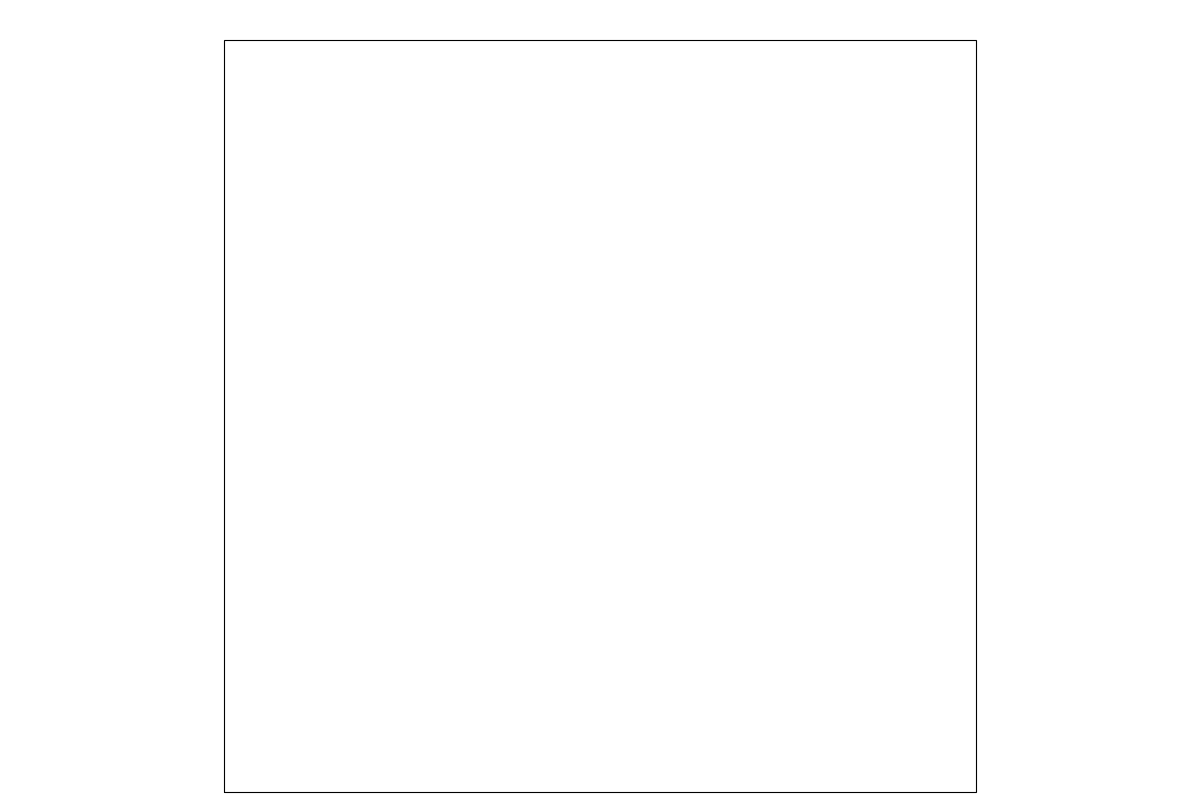

In [34]:
m = Maps()
m.plot_specs.crs = m.crs_list.GOOGLE_MERCATOR   # set the correct crs so that we don't reproject the images
m.add_wms.OpenStreetMap.OSM_mundialis.add_layer.OSM_WMS()

## 🚀 ....but there's more! 
#### For example: Comparing WebMaps (or other data-layers)

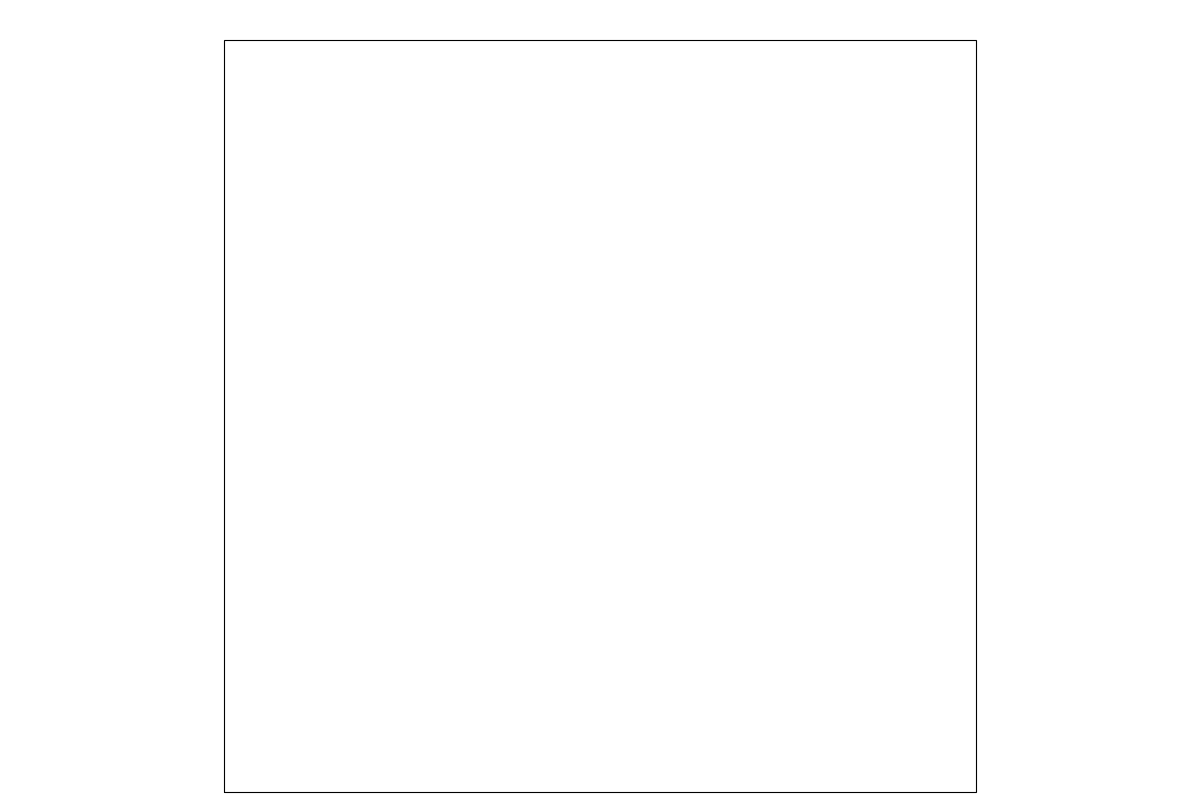

EOmaps: ... adding wms-layer: WORLDCOVER_2020_S2_TCC
EOmaps: ... adding wms-layer: WORLDCOVER_2020_MAP


'cb_0__single__3'

In [35]:
m = Maps()
# set the crs to GOOGLE_MERCATOR to avoid re-projecting the data
m.plot_specs.crs = m.crs_list.GOOGLE_MERCATOR
# add S1GBM
m.add_wms.S1GBM.add_layer.vv()
# add Sentinel-2 TCC and put it on layer 1
m.add_wms.ESA_WorldCover.add_layer.WORLDCOVER_2020_S2_TCC(1)
# add ESA WorldCover and put it on layer 2
m.add_wms.ESA_WorldCover.add_layer.WORLDCOVER_2020_MAP(2)

# add a callback to peek on layer 1 with the left mouse-button
m.cb.click.attach.peek_layer(layer=1, how=.2)
m.cb.click.attach.peek_layer(layer=2, how="left", button=3)

# add support to switch layers with number-keys
m.cb.keypress.attach.switch_layer(layer=0, key="0")
m.cb.keypress.attach.switch_layer(layer=1, key="1")
m.cb.keypress.attach.switch_layer(layer=2, key="2")

# add some static text
txt0 = m.figure.ax.text(.5, .95, "Sentinel-1 Global Backscatter Model (VV)", transform=m.figure.ax.transAxes, color="w", horizontalalignment="center", fontsize=12)
# add a callback that dynamically updates the text for the overlay
def cb(self, txt, **kwargs):
    txt = self.figure.ax.text(.5, .92, txt, 
                              transform=self.figure.ax.transAxes, 
                              color="w", 
                              horizontalalignment="center")
    self.BM.add_artist(txt)
    self.cb.click._temporary_artists.append(txt)

    # set the overlay-text callbacks
m.cb.click.attach(cb, button=1, txt="overlay: Sentinel-2 true-color composite")
m.cb.click.attach(cb, button=3, txt="overlay: ESA WorldCover")

## ☄ Get additional infos for fetched WebMap layers
- additional information can be obtained from the WebMap layer objects
- if a link to a legend is provided, it can directly be added to the plot
  - you can move the legend by dragging it 
  - you can scale the legend by clicking on it while turning the mouse-wheel  
    (in a JupyterNotebook context hold down "alt" as well to avoid scrolling the page)
- for services that allow additional kwargs (e.g. time), the arguments can simply be passed to the layer-call

In [36]:
m = Maps()
layer = m.add_wmts.NASA_GIBS.add_layer.AIRS_L2_Carbon_Monoxide_500hPa_Volume_Mixing_Ratio_Day

In [37]:
layer.info


 LEGEND available: True

index : '73'
id : 'AIRS_L2_Carbon_Monoxide_500hPa_Volume_Mixing_Ratio_Day'
name : 'AIRS_L2_Carbon_Monoxide_500hPa_Volume_Mixing_Ratio_Day'
title : ('Carbon Monoxide (L2, 500hPa, Day, v6, Near '
 'Real-Time, AIRS, Aqua)')
boundingBoxWGS84 : (-180.0, -90.0, 180.0, 90.0)
_tilematrixsets : ['2km']
tilematrixsetlinks : {'2km': <TileMatrixSetLink: 2km, tilematrixlimits={...}>}
resourceURLs : [{...}]
styles : {'default': {...}}
formats : ['image/png']



In [38]:
layer.get_dimension()

OrderedDict([('ows:Identifier', 'Time'),
             ('ows:UOM', 'ISO8601'),
             ('Default', '2020-09-23'),
             ('Current', 'false'),
             ('Value', '2020-01-16/2020-09-23/P1D')])

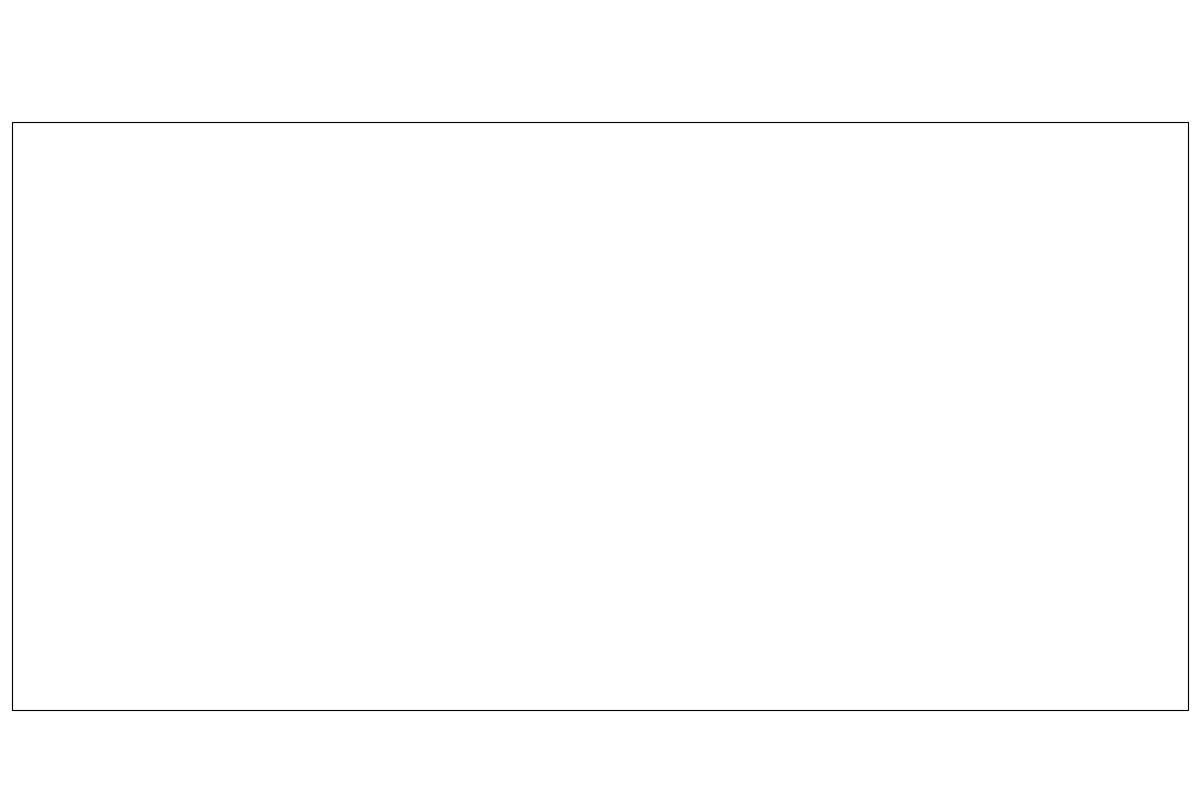

EOmaps: Adding wmts-layer: AIRS_L2_Carbon_Monoxide_500hPa_Volume_Mixing_Ratio_Day


In [39]:
layer(time='2020-03-13')   # add the layer at a specific timestamp

# add a legend that you can move around with the mouse and scale with the mousewheel!
# (use "alt + mousewheel" to avoid scrolling the JupyterNotebook)
leg = layer.add_legend()
m.add_coastlines()